Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


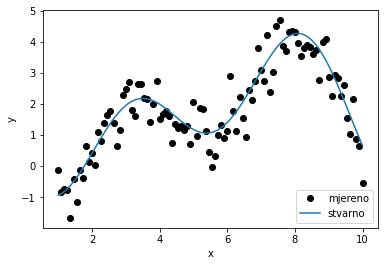

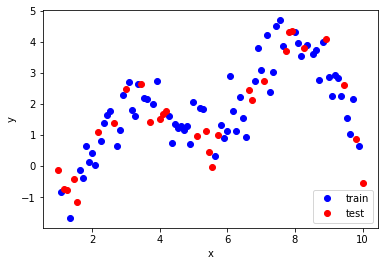

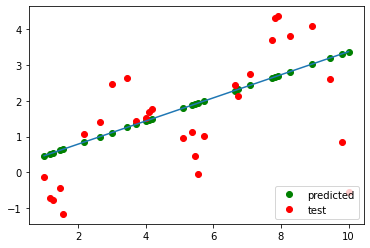

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


Theta0 =  [0.14219055] 
Theta1 =  [0.3225882]
y_thetaML =  0.14219054706711476  +  0.3225881958054343 x


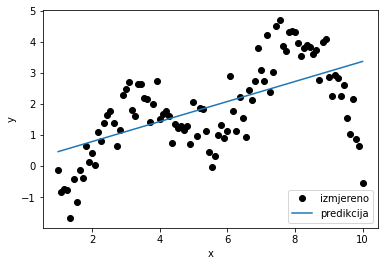

In [13]:
x_train = xtrain
x_train = np.insert(x_train,0,1,axis=1)

def getThetaML(x,y):
    return (np.linalg.inv(np.matrix.transpose(x)@x))@np.matrix.transpose(x)@y

thetaML = getThetaML(x_train,ytrain)
print('Theta0 = ',thetaML[0], '\nTheta1 = ', thetaML[1])
y_thetaML = thetaML[0][0] + thetaML[1][0]*x
print('y_thetaML = ', thetaML[0][0], ' + ', thetaML[1][0], 'x')

plt.figure(1)
plt.plot(x,y_measured,'ok',label='izmjereno')
plt.plot(x,y_thetaML,label='predikcija')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

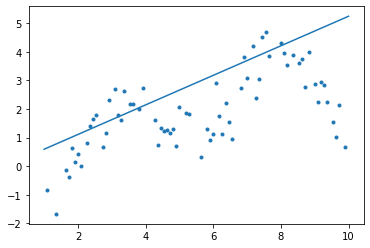

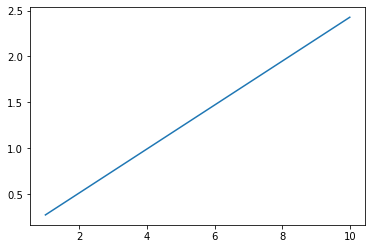

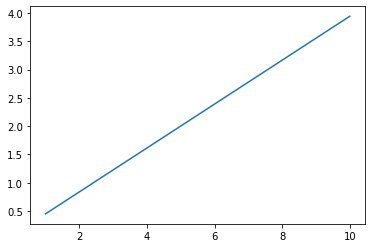

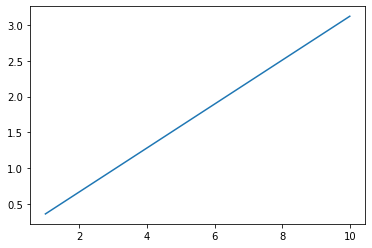

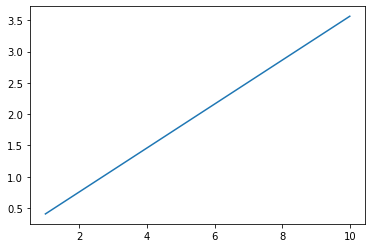

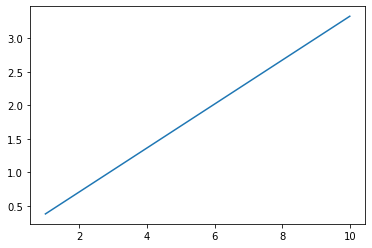

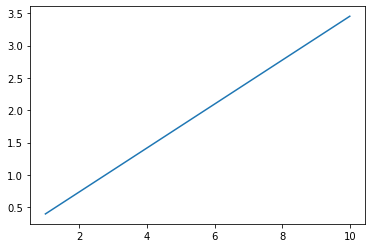

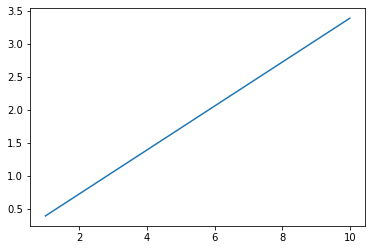

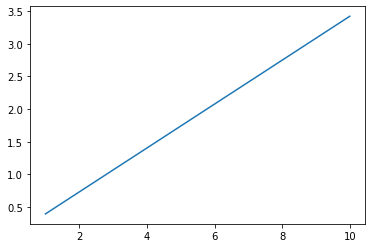

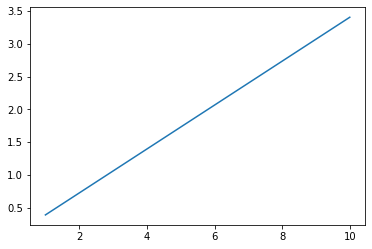

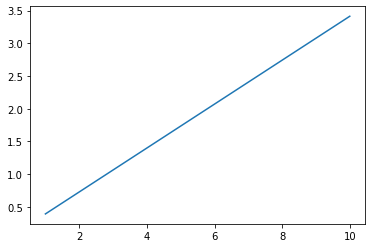

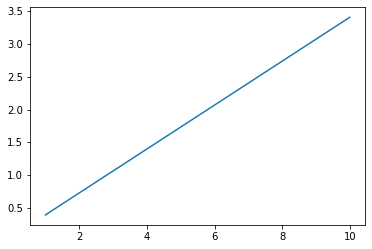

KeyboardInterrupt: ignored

In [17]:
def predict(x, theta):
 
    return theta[0] + theta[1]*x
 
def kriterijJ(x, y, theta):
 
    J = 0.0
    n = x.shape[0]
 
    for i in range(0,n):
        J += (predict(x[i], theta) - y[i]) ** 2
 
    J /= (2*n)
 
    return J
 
n_samples= 70
no_iter = 100
alfa = 0.04
theta_old = np.array([0.0, 0.0])
theta_new = np.zeros((2,1))
J = np.zeros((no_iter,1))
 
xp = np.array([x.min(), x.max()])
yp = np.zeros((2,1))
 
plt.figure(4)
plt.scatter(xtrain, ytrain, marker='.')
 
for iter in range(0, n_samples):
 
    J[iter] = kriterijJ(xtrain,ytrain,theta_old)
 
    rj0 = 0.0
    rj1 = 0.0
 
    for i in range(0,n_samples):
        rj0 += predict(xtrain[i],theta_old) - ytrain[i]
        rj1 += (predict(xtrain[i],theta_old) - ytrain[i])*xtrain[i]
 
    rj0 /= n_samples
    rj1 /= n_samples
 
    theta_new[0] = theta_old[0] - alfa * rj0
    theta_new[1] = theta_old[1] - alfa * rj1
 
    theta_old = theta_new
 
    yp[0] = predict(xp[0],theta_new)
    yp[1] = predict(xp[1],theta_new)
 
    plt.plot(xp,yp)
    plt.pause(0.1)
 
print("Theta0: ", theta_old[0])
print("Theta1: ", theta_old[1])


[0.686262720339181, 0.31157034291242314, 1.2745083887453057]


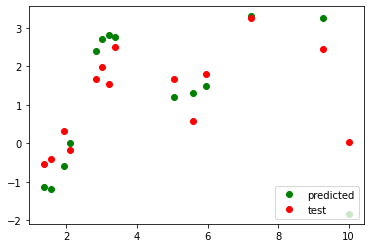

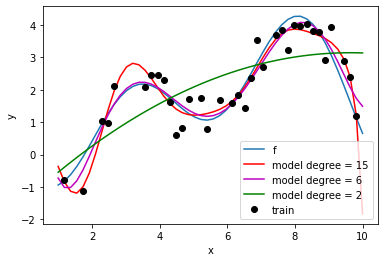

In [20]:
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

poly = PolynomialFeatures(degree=15)
poly2 = PolynomialFeatures(degree=6)
poly3 = PolynomialFeatures(degree=2)
xnew = poly.fit_transform(x)
xnew2 = poly2.fit_transform(x)
xnew3 = poly3.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
xtrain2 = xnew2[indeksi_train,]
xtrain3 = xnew3[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
xtest2= xnew2[indeksi_test,]
xtest3 = xnew3[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain)
linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain)

ytest_p = linearModel.predict(xtest)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)
MSE_test = [mean_squared_error(ytest, ytest_p),mean_squared_error(ytest,ytest_p2), mean_squared_error(ytest,ytest_p3)]

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model degree = 15')
plt.plot(x,linearModel2.predict(xnew2),'m-',label='model degree = 6')
plt.plot(x,linearModel3.predict(xnew3),'g-',label='model degree = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

print(MSE_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[[ 0.00000000e+00 -6.91703156e-02 -9.64029713e-02 -2.54846512e-02
   1.25873620e-01  1.54255368e-01 -9.01383490e-02 -1.40031650e-02
   1.85766473e-02 -4.78368236e-03  4.14727116e-04  3.62659755e-05
  -1.19678899e-05  1.18210694e-06 -5.51878796e-08  1.03127934e-09]] Ridge()


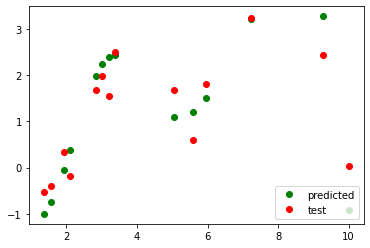

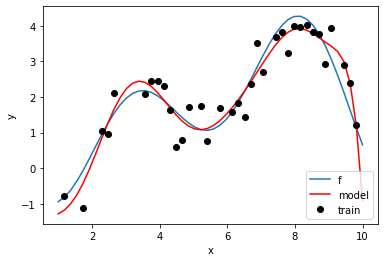

In [21]:
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)

indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.Ridge()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

print(linearModel.coef_, linearModel)
